In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use("fivethirtyeight")
from IPython.display import Image
from sklearn.cross_validation import train_test_split, cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
from sklearn.linear_model import LogisticRegression, LinearRegression
from sklearn.datasets import make_classification;

C:\ProgramData\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


# <b>Logistic Regression</b>

- Logistic regression is a generalization of the linear regression model adapted to
 to classification problems.
 
- Very popular because it's very fast and interpretable. Doesn't need scaling or much tuning.

- Not vulnerable to overfitting when you don't have many features.
 
- In linear regression, we use a set of quantitative feature variables to predict a continuous response variable. In logistic regression, we use a set of quantitative feature variables to predict probabilities of class membership.

- Named for the function used at the core of the method, the logistic function aka the sigmoid function. 

- Logistic regression is a linear regression between our feature, X, and the log-odds of our data belonging to a certain class that we will call true for the sake of generalization.

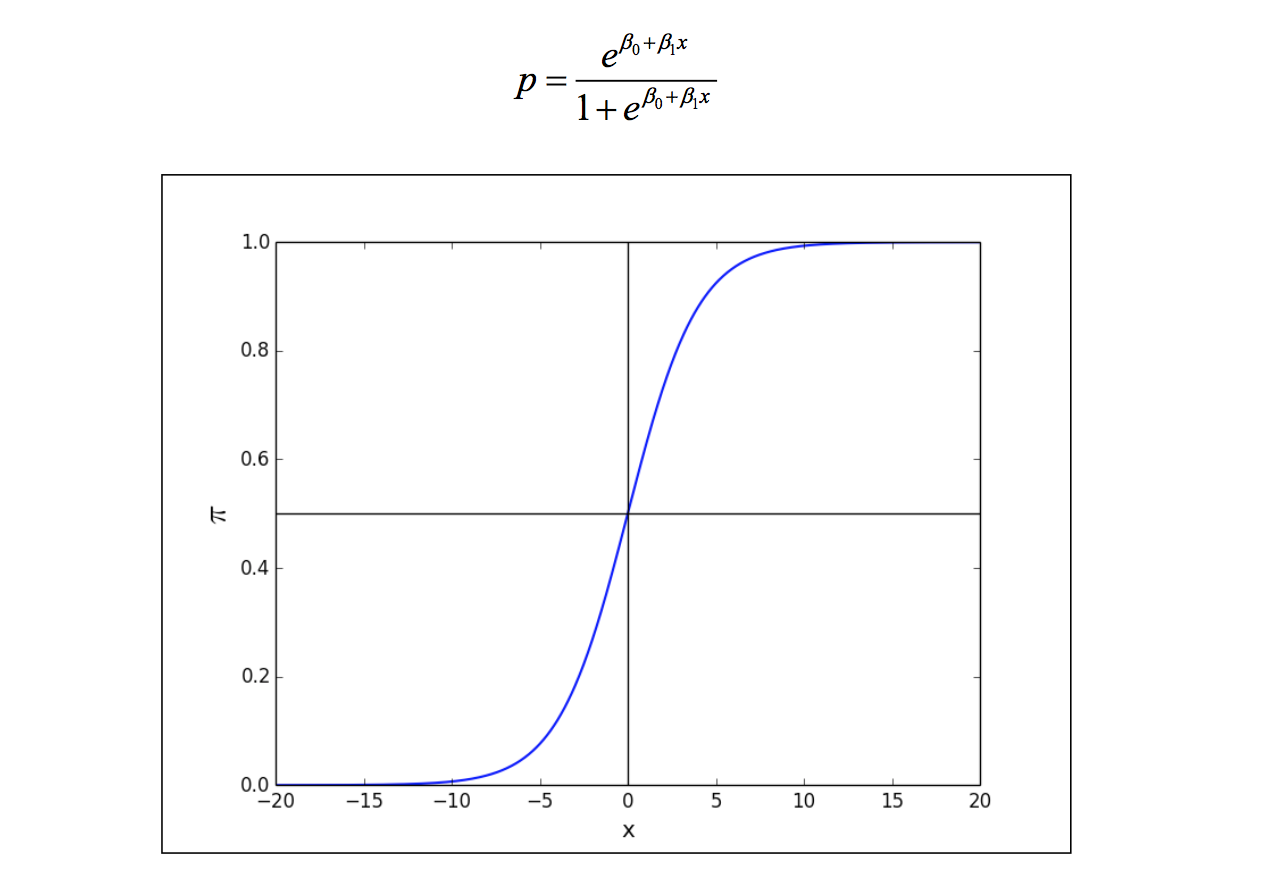

In [2]:
Image("logit_model.png")
#Source: Sinan Ozdemir

The preceding graph represents the logistic function's ability to map our continuous input, x, to a smooth probability curve that begins at the left, near probability 0, and as we increase x, our probability of belonging to a certain class rises naturally and smoothly up to probability 1. 


In other words:

    • Logistic regression gives an output of the probabilities of a specific class being true
    
    • Those probabilities can be converted into class predictions: if p>= 0.5 the models returns 1 and if p<.0.5 it returns 0
    
    • Logistic function is S-shaped and will always produced values > 0 and < 1.
    
    • Not all relationships as you know are linear, so LR is not always the right model.
    


### <b>Key difference in use of coefficients in linear vs logistic</b>
<br>
Linear Regression: Betas/coefficients represents the change in the response variable for a unit change in x. 

Logistic Regression: They represents the change in the log-odds. For a unit change in x. This means that e^β gives us the change in the odds for a unit change in x.

Coding time:

In [5]:
#Use Sklearn to create fake data
data = make_classification(n_samples=300,n_features=2,class_sep=.86,n_informative=2,
                         n_redundant=0, n_repeated=0,n_classes=2, random_state=8)
#returns a tuple with the features in index 0 and target in index 1

In [6]:
data

(array([[ 1.11900829, -0.85894917],
        [-1.08270129, -0.50207552],
        [-0.11277184,  2.17362044],
        [ 0.52651038,  1.24552866],
        [ 1.15893301,  0.76480764],
        [-1.46555629, -0.32075754],
        [ 1.60329337, -0.32233814],
        [ 0.33099551, -0.7914704 ],
        [-0.82640675,  0.58370805],
        [-2.34679304, -1.55459968],
        [-0.28693725,  1.78233062],
        [ 2.82012852, -1.23623958],
        [ 1.8081755 , -0.96071833],
        [-2.5085041 , -1.65305687],
        [ 0.19396071,  1.74490839],
        [ 0.41519922, -0.77262606],
        [-0.71243081,  1.01926188],
        [ 1.28888374, -1.01987775],
        [-3.11589802,  0.37448034],
        [-0.32994955,  1.25336972],
        [ 0.14105213,  0.58034114],
        [ 0.91376599,  0.08068081],
        [-0.39644942, -1.76252557],
        [ 0.6901151 ,  0.99810096],
        [ 2.70068859, -1.24599405],
        [ 1.28014874, -1.08560538],
        [ 1.24734952,  1.04737006],
        [ 0.56050918, -0.868

In [7]:
#Transform fake data into pandas dataframe
cols = ["feature_one", "feature_two"]
df = pd.DataFrame(data[0], columns=cols)
df["target"] = data[1]
#assign red to class 0 and blue to class 1. For plotting purposes.
color = df.target.map({0:"blue", 1:"red"})

In [8]:
df.head()

,feature_one,feature_two,target
0,1.119008,-0.858949,1
1,-1.082701,-0.502076,0
2,-0.112772,2.173620,0
3,0.526510,1.245529,1
4,1.158933,0.764808,1


Let's visualize the fake data and try to imagine what a linear boundary separating the two groups would look like.

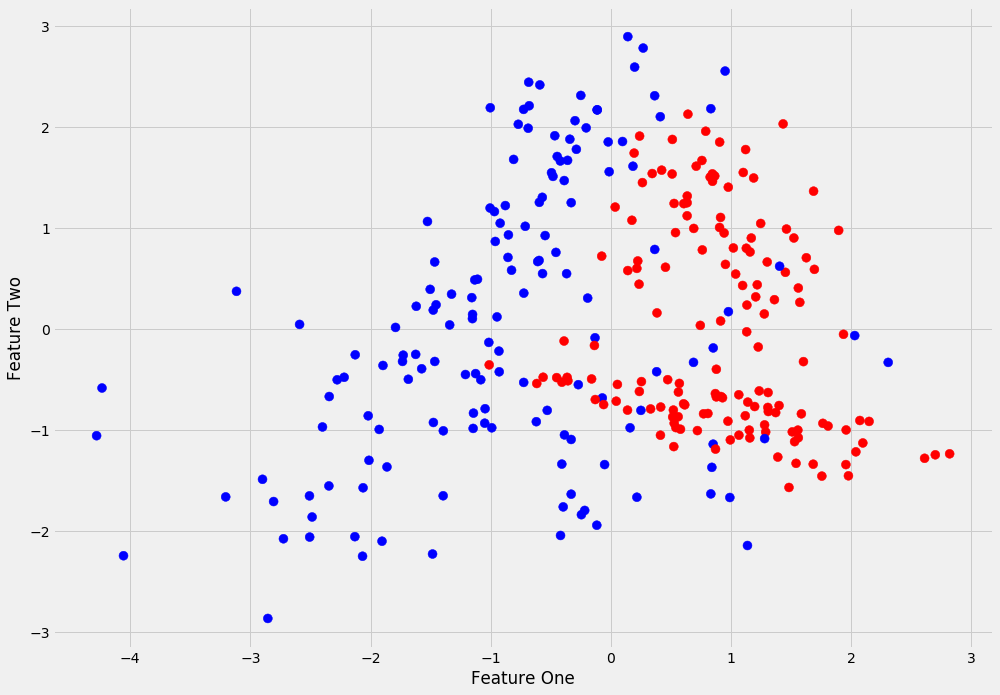

In [9]:
plt.figure(figsize=(15,11))
plt.scatter(df.feature_one, df.feature_two, c=color, s=80)
plt.xlabel("Feature One",)
plt.ylabel("Feature Two");

If you had to draw a straight line that best separates the two classes, where would you put the line?
<br><br>
Let's focus on Feature One and plot it against the target variable

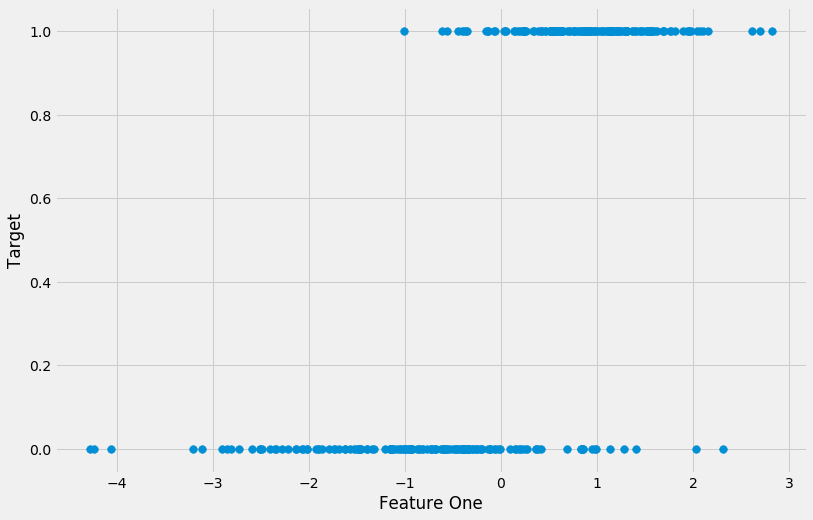

In [10]:
plt.figure(figsize=(12,8))
plt.scatter(df.feature_one, df.target, s=60)
plt.xlabel("Feature One")
plt.ylabel("Target");

Whats the relationship between the two variables?

In [11]:
#Sort the dataframe by the feature one and create a new data frame from that.
df2 = df.sort("feature_one").copy()

AttributeError: 'DataFrame' object has no attribute 'sort'

In [12]:
df2=df.sort_values("feature_one").copy()

Create a linear regression model trained on feature one to predict the target variable

In [13]:
#Create X and y variables
X = df2[["feature_one"]]
y = df2.target
#Intialize model
linreg=LinearRegression()

#Fit model
linreg.fit(X,y)

#Make predictions on X and assign them to pred variable
pred=linreg.predict(X)

Plot the data with the predictions

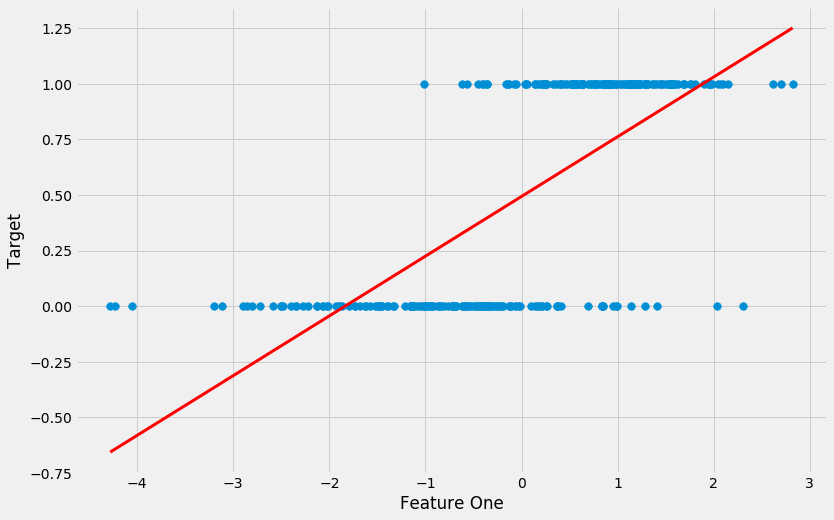

In [14]:
plt.figure(figsize=(12,8))
plt.xlabel("Feature One")
plt.ylabel("Target")
plt.scatter(X,y, s=60)
plt.plot(X, pred, c="r", linewidth=3);


<b> How does this model look?</b>

<b> Look at the S-function from above, how do you think it would fit the data? </b>

<br><br><br><br><br><br><br>


<b> Let's find out!</b>

Let's fit a logistic regression model on the data above and plot the predicted labels and the probabilities

In [15]:
#Intialize and fit a logistic regression model
logr = LogisticRegression()
logr.fit(X,y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
#Score the model 
score = logr.score(X,y)
print "The accuracy score is {:.2f} percent".format(score*100)

The accuracy score is 86.33 percent


In [17]:
#Generate label predictions
logr.predict(X)

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1])

In [18]:
#Assign label predictions to pred_labels
pred_labels = logr.predict(X)

In [19]:
#Generate probability predictions
logr.predict_proba(X)


array([[  9.99934505e-01,   6.54949215e-05],
       [  9.99927747e-01,   7.22527540e-05],
       [  9.99893239e-01,   1.06761336e-04],
       [  9.99317164e-01,   6.82835708e-04],
       [  9.99169540e-01,   8.30460491e-04],
       [  9.98668583e-01,   1.33141708e-03],
       [  9.98533687e-01,   1.46631306e-03],
       [  9.98371829e-01,   1.62817083e-03],
       [  9.98053501e-01,   1.94649942e-03],
       [  9.97392806e-01,   2.60719444e-03],
       [  9.96881653e-01,   3.11834738e-03],
       [  9.96869331e-01,   3.13066919e-03],
       [  9.96728505e-01,   3.27149503e-03],
       [  9.96054204e-01,   3.94579582e-03],
       [  9.95568013e-01,   4.43198668e-03],
       [  9.95541718e-01,   4.45828160e-03],
       [  9.94853782e-01,   5.14621777e-03],
       [  9.94160828e-01,   5.83917158e-03],
       [  9.92915802e-01,   7.08419800e-03],
       [  9.92870678e-01,   7.12932201e-03],
       [  9.91862835e-01,   8.13716481e-03],
       [  9.91784125e-01,   8.21587456e-03],
       [  

The first column indicates the predicted probability of class 0, and the second column indicates the predicted probability of class 1.

In [20]:
#Assign probability of class 1 to pred_probs
pred_probs=logr.predict_proba(X)


### <b>Put it all together and have a gander</b>

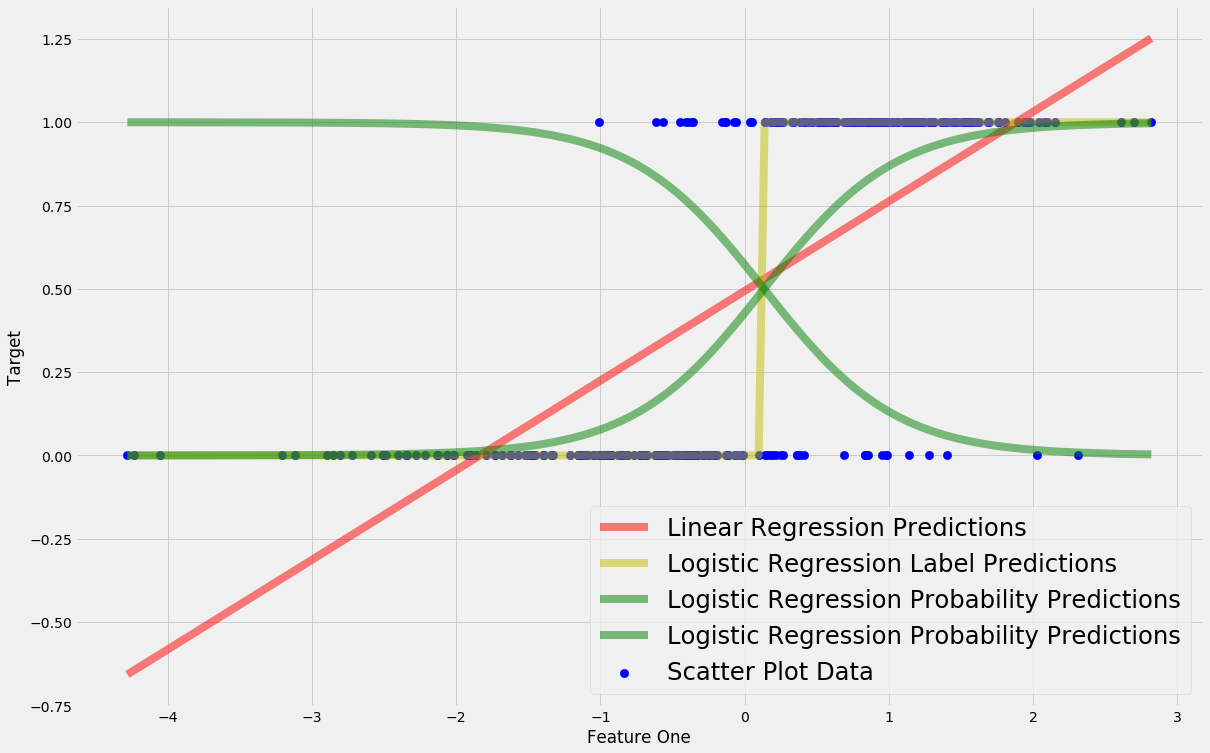

In [21]:
plt.figure(figsize=(18,12))
plt.xlabel("Feature One")
plt.ylabel("Target")

plt.scatter(X,y, s=70, c= "blue", alpha=1, label="Scatter Plot Data")
plt.plot(X, pred, c="r", linewidth=8, alpha=.5, label = "Linear Regression Predictions")
plt.plot(X, pred_labels, c="y", linewidth=8, alpha=.5, label = "Logistic Regression Label Predictions")
plt.plot(X, pred_probs, c="g", linewidth=8, alpha=.5, label = "Logistic Regression Probability Predictions")

plt.legend(loc=4, fontsize="xx-large");

### <b> What do you see? What catches your attention?</b>

Go back to the original dataset with two features and visualize the linear boundary

In [22]:
#This function allows us to see the model
def plot_decision_boundary(model, X, y):
    X_max = X.max(axis=0)
    X_min = X.min(axis=0)
    xticks = np.linspace(X_min[0], X_max[0], 100)
    yticks = np.linspace(X_min[1], X_max[1], 100)
    xx, yy = np.meshgrid(xticks, yticks)
    ZZ = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = ZZ >= 0.5
    Z = Z.reshape(xx.shape)
    fig, ax = plt.subplots()
    ax = plt.gca()
    ax.contourf(xx, yy, Z, cmap=plt.cm.bwr, alpha=0.2)
    ax.scatter(X[:,0], X[:,1], c=y,s=40, alpha=0.4)
    plt.xlabel("Feature One")
    plt.ylabel("Feature Two")

In [23]:
#Create X and y variables from data using df
X = df.drop("target", axis=1)
y = df.target
#Color code y
color = y.map({0:"blue", 1:"red"})

In [24]:
#Intialize model and fit it to X and y
lr = LogisticRegression()
lr.fit(X,y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

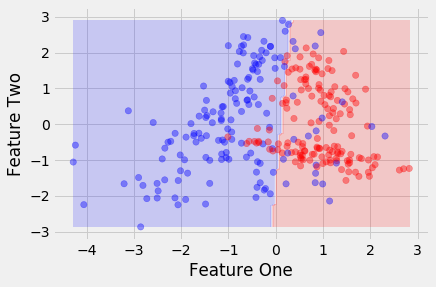

In [26]:
#Pass the model and the data into the plot_decision_boundary function
# plot_decision_boundary(lr, X.values,color);
plot_decision_boundary(lr, X.values,color);

<b> Does the boundary above match the one I asked you to imagine earlier? </b>

## <b> Can you use Spotify data to predict whether or not I will like a song? </b>

<b> Attributes </b>


    Acousticness: A confidence measure from 0.0 to 1.0 of whether the track is acoustic. 1.0 represents high confidence the track is acoustic.
    
    Danceability: Danceability describes how suitable a track is for dancing based on a combination of musical elements including tempo, rhythm stability, beat strength, and overall regularity. A value of 0.0 is least danceable and 1.0 is most danceable.

    Instrumentalness: Predicts whether a track contains no vocals. "Ooh" and "aah" sounds are treated as instrumental in this context. Rap or spoken word tracks are clearly "vocal". The closer the instrumentalness value is to 1.0, the greater likelihood the track contains no vocal content. Values above 0.5 are intended to represent instrumental tracks, but confidence is higher as the value approaches 1.0.
    
    Loudness: The overall loudness of a track in decibels (dB). Loudness values are averaged across the entire track and are useful for comparing relative loudness of tracks. Loudness is the quality of a sound that is the primary psychological correlate of physical strength (amplitude). Values typical range between -60 and 0 db.
    
    Mode: Mode indicates the modality (major or minor) of a track, the type of scale from which its melodic content is derived. Major is represented by 1 and minor is 0.

    Valence: A measure from 0.0 to 1.0 describing the musical positiveness conveyed by a track. Tracks with high valence sound more positive (e.g. happy, cheerful, euphoric), while tracks with low valence sound more negative (e.g. sad, depressed, angry).
    
    Tempo: The overall estimated tempo of a track in beats per minute (BPM). In musical terminology, tempo is the speed or pace of a given piece and derives directly from the average beat duration.

    Energy: Energy is a measure from 0.0 to 1.0 and represents a perceptual measure of intensity and activity. Typically, energetic tracks feel fast, loud, and noisy. For example, death metal has high energy, while a Bach prelude scores low on the scale. Perceptual features contributing to this attribute include dynamic range, perceived loudness, timbre, onset rate, and general entropy.
    
More information here https://developer.spotify.com/web-api/get-audio-features/

Dataset of songs I like and dislike. Target == 1 means liked song and Target == 0 means disliked song

In [27]:
#Load the datafile "Spotify_Data.pkl" and check it out
df = pd.read_pickle("Spotify_Data.pkl")
df.head()

,acousticness,mode,tempo,loudness,danceability,instrumentalness,valence,energy,target
Mask_Off***Future,0.0102,1,150.062,-8.795,0.833,0.021900,0.286,0.434,1
Redbone***Childish_Gambino,0.1990,1,160.083,-10.401,0.743,0.006110,0.588,0.359,1
Xanny_Family***Future,0.0344,1,75.044,-7.148,0.838,0.000234,0.173,0.412,1
Master_Of_None***Beach_House,0.6040,1,86.468,-15.236,0.494,0.510000,0.230,0.338,1
Parallel_Lines***Junior_Boys,0.1800,0,174.004,-11.648,0.678,0.512000,0.904,0.561,1


In [43]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
acousticness,2017.0,0.187590,0.259989,0.000003,0.00963,0.063300,0.265,0.995
mode,2017.0,0.612295,0.487347,0.000000,0.00000,1.000000,1.000,1.000
tempo,2017.0,121.603272,26.685604,47.859000,100.18900,121.427000,137.849,219.331
loudness,2017.0,-7.085624,3.761684,-33.097000,-8.39400,-6.248000,-4.746,-0.307
danceability,2017.0,0.618422,0.161029,0.122000,0.51400,0.631000,0.738,0.984
instrumentalness,2017.0,0.133286,0.273162,0.000000,0.00000,0.000076,0.054,0.976
valence,2017.0,0.496815,0.247195,0.034800,0.29500,0.492000,0.691,0.992
energy,2017.0,0.681577,0.210273,0.014800,0.56300,0.715000,0.846,0.998
target,2017.0,0.505702,0.500091,0.000000,0.00000,1.000000,1.000,1.000


<b>Quick EDA</b>: Summary stats grouped by class and correlations

In [28]:
df.tail()

,acousticness,mode,tempo,loudness,danceability,instrumentalness,valence,energy,target
Like_A_Bitch_-_Kill_The_Noise_Remix***Kill_The_Noise,0.00106,1,74.976,-3.501,0.584,0.002690,0.211,0.932,0
Candy***Dillon_Francis,0.08770,1,110.041,-2.663,0.894,0.001670,0.867,0.892,0
Habit_-_Dack_Janiels_&_Wenzday_Remix***Rain_Man,0.00857,1,150.082,-2.467,0.637,0.003990,0.470,0.935,0
First_Contact***Twin_Moons,0.00164,1,150.011,-2.735,0.557,0.677000,0.623,0.992,0
I_Wanna_Get_Better***Bleachers,0.00281,1,190.013,-6.221,0.446,0.000039,0.402,0.915,0


In [29]:
#What is the average value for each feature grouped by class
df.groupby('target').mean()

,acousticness,mode,tempo,loudness,danceability,instrumentalness,valence,energy
target,,,,,,,,
0,0.221670,0.647944,120.666027,-6.811743,0.589648,0.091135,0.469836,0.673138
1,0.154279,0.577451,122.519382,-7.353329,0.646547,0.174486,0.523186,0.689826


In [30]:
#What are the correlations of the features?
df.corr()

,acousticness,mode,tempo,loudness,danceability,instrumentalness,valence,energy,target
acousticness,1.000000,0.068028,-0.127596,-0.562021,-0.179894,0.144397,-0.152227,-0.646319,-0.129627
mode,0.068028,1.000000,-0.059995,-0.044015,-0.047867,-0.030099,-0.032879,-0.070263,-0.072336
tempo,-0.127596,-0.059995,1.000000,0.156418,-0.143538,0.000347,-0.014965,0.165721,0.034732
loudness,-0.562021,-0.044015,0.156418,1.000000,0.104362,-0.354625,0.204968,0.762177,-0.072000
danceability,-0.179894,-0.047867,-0.143538,0.104362,1.000000,-0.130561,0.442061,0.038557,0.176706
instrumentalness,0.144397,-0.030099,0.000347,-0.354625,-0.130561,1.000000,-0.194630,-0.122890,0.152594
valence,-0.152227,-0.032879,-0.014965,0.204968,0.442061,-0.194630,1.000000,0.278383,0.107930
energy,-0.646319,-0.070263,0.165721,0.762177,0.038557,-0.122890,0.278383,1.000000,0.039688
target,-0.129627,-0.072336,0.034732,-0.072000,0.176706,0.152594,0.107930,0.039688,1.000000


<b> Thoughts? Things of interest? Which variables stick out to you? </b>

### <b> Train a logistic regression model on the data to predict whether or not I will like a certain song </b>

In [32]:
#Create X and y variables
X = df.drop("target",axis=1)
y = df.target

#Intialize, fit, and score the model
lr = LogisticRegression()

lr.fit(X,y)

score = lr.score(X,y)

print ("The model produces an accuracy score of {:.2f} percent".format(score*100))

The model produces an accuracy score of 63.96 percent


Is that a good or bad score? To find out let's compare it to the null accuracy.

In [33]:
#Find the null accuracy aka the benchmark score. Percents for each class.
y.value_counts(normalize=True)

1    0.505702
0    0.494298
Name: target, dtype: float64

### <b> Training/testing  </b>
1. Split the data into train/test splits
2. Fit data onto training set
3. Make predictions on test set with the training model
4. Calculate accuracy score by comparing predicted labels of the test set to its actual labels

In [39]:
#Step 1. Use test_size = 0.4 and random_state = 42
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.4, random_state=42)

#Step 2
lr=LogisticRegression()
lr.fit(X_train, y_train)

#Step 3
pred=lr.predict(X_test)

#Step 4
testing_score = accuracy_score(y_test,pred)

print ("The model accurately classified {:.2f} percent of the testing data".format(testing_score*100))

The model accurately classified 63.57 percent of the testing data


How does the testing accuracy compare to the first one?
<br><br><br><br>
Use cross validation to derive a truer testing accuracy score

In [42]:
cross_val_score(LogisticRegression(), X, y, cv=5, scoring="accuracy")

array([ 0.58910891,  0.65841584,  0.50620347,  0.61042184,  0.56079404])

In [40]:
#Use cross_val_score method to generate the average accuracy score for 5 CVs
mean_cv_score = cross_val_score(LogisticRegression(), X, y, cv=5, scoring="accuracy").mean()

print ("The cross validated accuracy score is {:.2f} percent").format(mean_cv_score*100)

The cross validated accuracy score is 58.50 percent


### <b>Probability, odds, e, log, log-odds</b>
<br>
Quick stats and probability detour

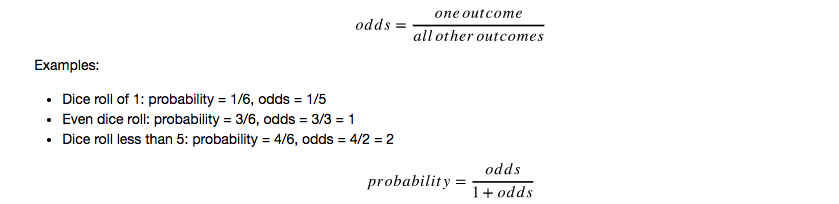

In [44]:
Image("odds_probs.png")

In [45]:
# create a table of probability versus odds
table = pd.DataFrame({'probability':[0.1, 0.2, 0.25, 0.5, 0.6, 0.8, 0.9]})
table['odds'] = table.probability/(1 - table.probability)
table

,probability,odds
0,0.10,0.111111
1,0.20,0.250000
2,0.25,0.333333
3,0.50,1.000000
4,0.60,1.500000
5,0.80,4.000000
6,0.90,9.000000


What is e? It is the base rate of growth shared by all continually growing processes:

In [46]:
# exponential function: e^1
np.exp(1)

2.7182818284590451

What is a (natural) log? It gives you the time needed to reach a certain level of growth:

In [47]:
# time needed to grow 1 unit to 2.718 units
np.log(2.718)

0.99989631572895199

It is also the inverse of the exponential function:

In [48]:
np.log(np.exp(5))

5.0

In [49]:
# add log-odds to the table
table['logodds'] = np.log(table.odds)
table

,probability,odds,logodds
0,0.10,0.111111,-2.197225
1,0.20,0.250000,-1.386294
2,0.25,0.333333,-1.098612
3,0.50,1.000000,0.000000
4,0.60,1.500000,0.405465
5,0.80,4.000000,1.386294
6,0.90,9.000000,2.197225


The log odds are what is passed throught the logistic function

<b>Train model using one feature: "valence"</b>

In [50]:
#V is the variable assigned to valence

V = df[["valence"]]
lr_V = LogisticRegression()
lr_V.fit(V,y)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [51]:
lr_V.intercept_

array([-0.39629355])

In [52]:
lr_V.coef_

array([[ 0.84579236]])

In [53]:
# compute predicted log-odds for valence_value=0.5...
#by multiplying it by coefficien and then adding the intercept to it

valence_value = 0.5
logodds = lr_V.intercept_ + lr_V.coef_[0]*valence_value
logodds

array([ 0.02660263])

In [54]:
# convert log-odds to odds
odds = np.exp(logodds)
odds

array([ 1.02695964])

In [55]:
# convert odds to probability
prob = odds/(1 + odds)
prob

array([ 0.50665027])

In [56]:
# compute predicted probability for valence_value using the predict_proba method
lr_V.predict_proba(valence_value)[:, 1]

array([ 0.50665027])

Positive coefficients increase the log-odds of the response (and thus increase the probability), and negative coefficients decrease the log-odds of the response (and thus decrease the probability).
<br><br><br><br><br><br><br><br>
Re-fit model but all the variables and make table of the coefficients and odds

In [57]:
X = df.drop("target", axis=1)
y = df.target
lr = LogisticRegression()
lr.fit(X,y);

In [58]:
#Table of coefficients and their values
coef = pd.DataFrame(zip(X.columns, np.transpose(lr.coef_[0])), columns=["coef", "value"])
coef

,coef,value
0,acousticness,-1.608505
1,mode,-0.240678
2,tempo,0.003301
3,loudness,-0.108442
4,danceability,1.821116
5,instrumentalness,1.202698
6,valence,0.620524
7,energy,0.344893


Odds ratio is the ratio of the odds(after increasing X_i by 1) over (divided) by odds(before increasing X_i by 1).

In [59]:
coef_odds = np.e**(coef["value"])
coef["odds_ratio"] = coef_odds
coef

,coef,value,odds_ratio
0,acousticness,-1.608505,0.200187
1,mode,-0.240678,0.786095
2,tempo,0.003301,1.003306
3,loudness,-0.108442,0.897231
4,danceability,1.821116,6.178751
5,instrumentalness,1.202698,3.329087
6,valence,0.620524,1.859902
7,energy,0.344893,1.411839


The increase in probability is hard to quantify.  The lower p(before) is, the greater increase you'll have vs. a higher p(before).

In [61]:
#Visualize how the Beta and intercept can affect the probabilities
Image("curves.png")
#Source: Kevin Markham

Changing the $\beta_0$ or intercept value shifts the curve horizontally, whereas changing the $\beta_1$ or coefficient value changes the slope of the curve.

## <b> AUC and ROC Curves </b>

ROC = Receiver operating characteristic
<br>
AUC = Area under curve

### <b>Recall and Precision scores</b>
<br><br>
<b>Recall aka the True Positive Rate:</b> What percent of the data that is labelled class A was correctly identified as class A 
<br><br>
<b>Precision:</b> What percent of the data that is classified as class A actually belongs to class A

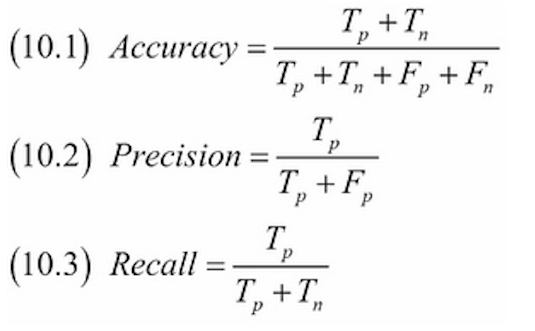

In [62]:
Image("acc_rec_prec.png")

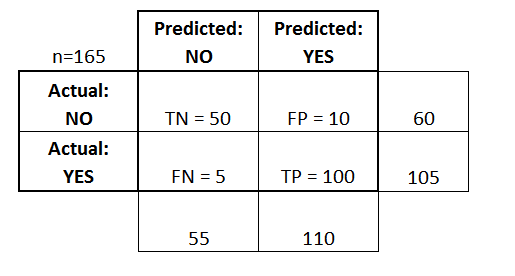

In [63]:
#Visualize example confusion matrix
Image("con_matrix.png")
#Source: Kevin Markham

### <b>Create confusion matrix for the Spotify data and calculate recall and precision scores

In [64]:
#Make a train test split of the spotify data and train a logistic regression model
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.4,
                                                    random_state=4)

lr = LogisticRegression()
lr.fit(X_train, y_train)
preds = lr.predict(X_test)

In [65]:
#Null accuracy of y_test
y_test.value_counts(normalize=True)

1    0.524164
0    0.475836
Name: target, dtype: float64

In [66]:
#Pass the predictions and y_test into a confusion matrix
confusion_matrix(y_test, preds)

array([[253, 131],
       [179, 244]])

In [67]:
#Calculate accuracy, precision and recall scores
acs = float(accuracy_score(y_test,preds))
ps = float(precision_score(y_test,preds))
rs = float(recall_score(y_test,preds))

print ("Accuracy score = {:.2f}".format(acs*100))
print ("Precision score = {:.2f}".format(ps*100))
print ("Recall score = {:.2f}".format(rs*100))

Accuracy score = 61.59
Precision score = 65.07
Recall score = 57.68


<b>False Positive Score:</b> Number of events wrongly classified as True divided by the number of negative events:
<br><br>
Example: Giving a bank loan to someone who defaults

In [68]:
#We have to calculate false positive score using our function

def FPR(YT, PR): 
    """
    YT is the target variable for the testing set
    PR is the predictions made on the features of the testing set
    """
    CM = confusion_matrix(YT, PR)
    TN = CM[0, 0]
    FP = CM[0, 1]
    FPR = FP/(float(FP+ TN))
    return FPR

In [69]:
#Call FPR on the y_test and predicted labels objects
FPR(y_test,preds)

0.34114583333333331

Onto plotting the ROC curve

In [70]:
#Derive probabilities of class 1 from the test set
test_probs = lr.predict_proba(X_test)[:,1]
#Pass in the test_probs variable and the true test labels aka y_test in the roc_curve function
fpr, tpr, thres = roc_curve(y_test, test_probs)
#Will explain the fpr, tpr, thresholds

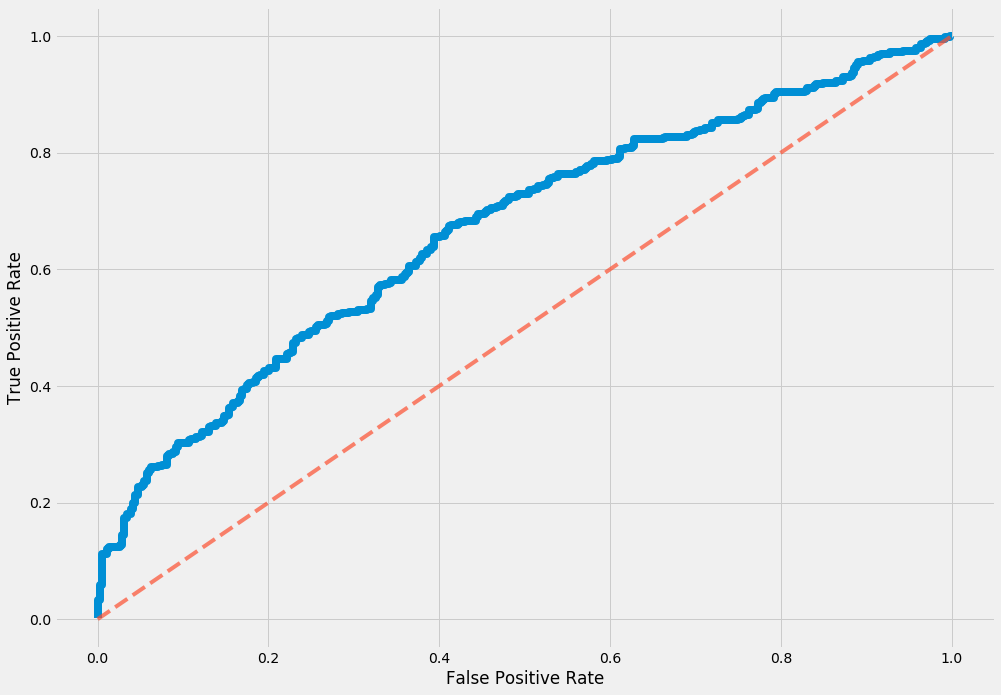

In [71]:
#Plotting False Positive Rates vs the True Positive Rates
#Dotted line represents a useless model
plt.figure(figsize=(15,11))
plt.plot(fpr, tpr, linewidth=8)
plt.plot([0,1], [0,1], "--", alpha=.7)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")

plt.show()

<b> What does this tell us about the model? Is it a good or bad model?<b>

In [72]:
#Caculate the area under the curve score using roc_auc_score
roc_auc_score(y_test, test_probs)

0.66736849881796689

Take a look at some other roc curves

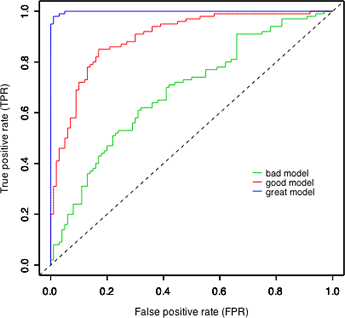

In [73]:
Image("roc_curves.png",width=500, height=500)

<b> How thresholds affect the TPR and FPR? </b>

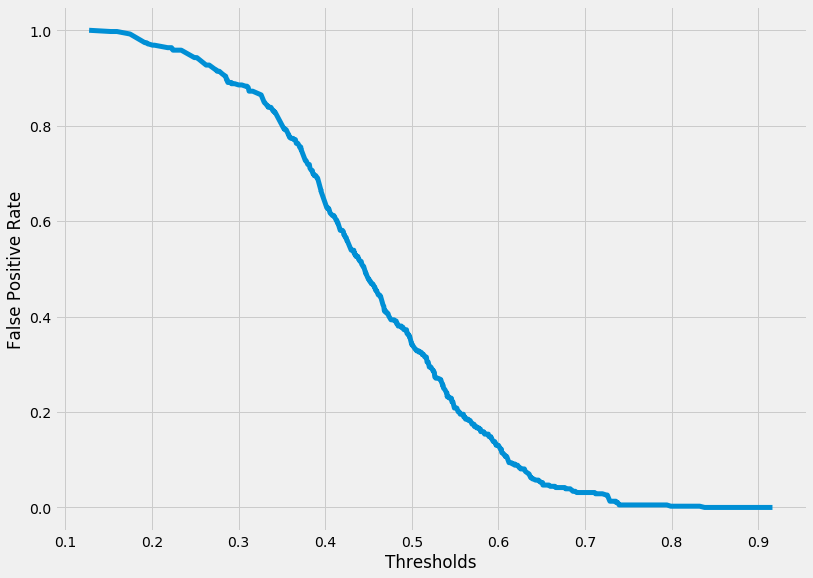

In [74]:
plt.figure(figsize=(12,9))
plt.plot(thres, fpr, linewidth=5)
plt.xlabel("Thresholds")
plt.ylabel("False Positive Rate");

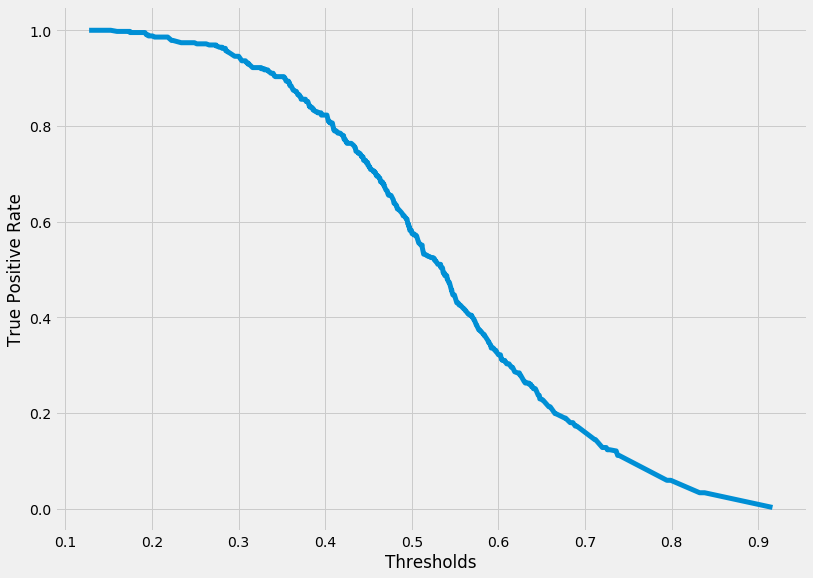

In [75]:
plt.figure(figsize=(12,9))
plt.plot(thres, tpr, linewidth=5)
plt.xlabel("Thresholds")
plt.ylabel("True Positive Rate");

What do you see here? Why are is there a negative correlation in both graphs?

### <b>Thresholds and model performance: Does tweaking the threshold give us a better model?</b>
<br><br>
Unfortunately there's no threshold to configure in a logistic regression model. 
<br>For example: lr = logisticregression(threshold=n) 
<br>
<br>So we need to create our own threshold function using the np.where method

In [82]:
#Assign all the values in test_probs >=0.7 == 1 and the rest equal to 0
#First argument is condition
#Second argument is the value you use to replace all the values that satisfy the condition
#Third argument is the value you use to replace all the values that don't satisfy the condition
labels_70 = np.where(test_probs>=0.7, 1, 0)
labels_70[:20]

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Does this give a better accuracy score?

In [83]:
accuracy_score(y_test, labels_70)

0.54522924411400253

In [85]:
#Put this in function form


def thres_acc(t, yt, tp):
    labels = np.where(tp>=t, 1, 0)
    return accuracy_score(yt, labels)

### <b>Plot various thresholds vs their accuracy scores</b>

In [87]:
#Create an array of 20 values evenly spaced between 0 and 1
thresholds = np.linspace(0,1, 30).tolist()
acc_scores = [thres_acc(i, y_test, test_probs) for i in thresholds]

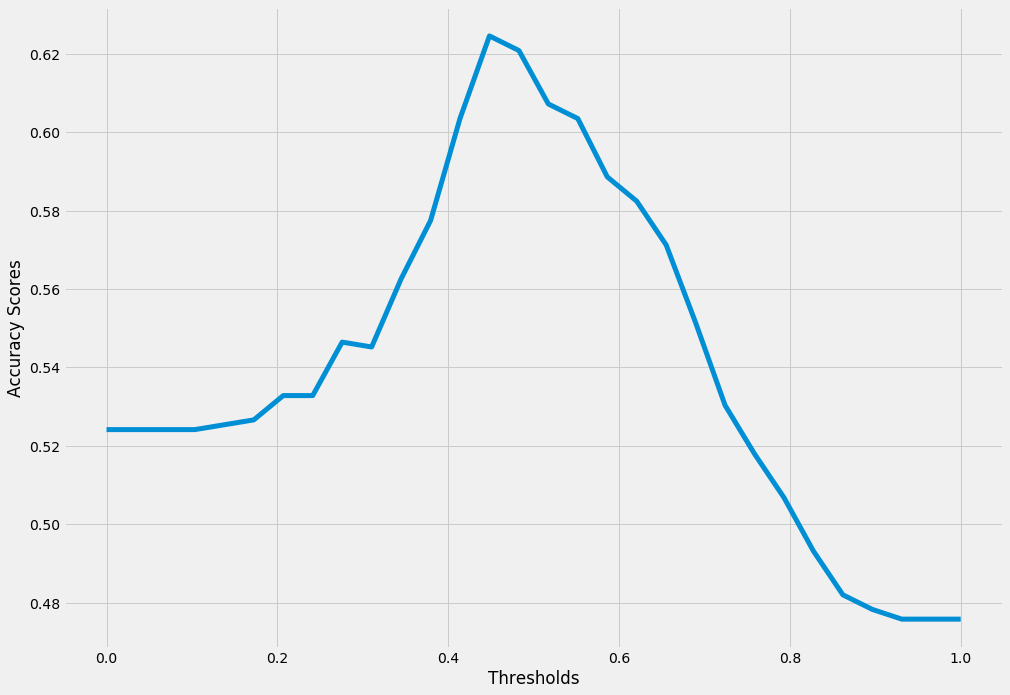

In [88]:
#Plot thresholds vs accuracy scores
plt.figure(figsize=(15,11))
plt.plot(thresholds, acc_scores, linewidth=5)
plt.xlabel("Thresholds")
plt.ylabel("Accuracy Scores")
plt.show()

Which threshold produces the best accuracy score?

In [90]:
#Make dictornary of thresholds and acc_scores.
thres_score_dict = dict(zip(thresholds,acc_scores))
thres_score_dict


{0.0: 0.52416356877323422,
 0.034482758620689655: 0.52416356877323422,
 0.06896551724137931: 0.52416356877323422,
 0.10344827586206896: 0.52416356877323422,
 0.13793103448275862: 0.52540272614622052,
 0.1724137931034483: 0.52664188351920693,
 0.20689655172413793: 0.53283767038413876,
 0.24137931034482757: 0.53283767038413876,
 0.27586206896551724: 0.54646840148698883,
 0.3103448275862069: 0.54522924411400253,
 0.3448275862068966: 0.56257744733581161,
 0.3793103448275862: 0.57744733581164809,
 0.41379310344827586: 0.60346964064436182,
 0.4482758620689655: 0.62453531598513012,
 0.48275862068965514: 0.620817843866171,
 0.5172413793103449: 0.60718711276332094,
 0.5517241379310345: 0.60346964064436182,
 0.5862068965517241: 0.58859975216852545,
 0.6206896551724138: 0.58240396530359351,
 0.6551724137931034: 0.57125154894671626,
 0.6896551724137931: 0.55142503097893436,
 0.7241379310344828: 0.53035935563816605,
 0.7586206896551724: 0.51796778190830239,
 0.7931034482758621: 0.50681536555142503,

In [91]:
#Sort dictionary to find key with the highest value
sorted(thres_score_dict.items(), key = lambda x:x[1], reverse=True)[0]

(0.4482758620689655, 0.62453531598513012)

# <b>In class work:</b>

    - Use feature engineering to create the best possible model to predict songs I like.
    - Use ROC curve to evaluate your models.
    - See which features are the most useful in predicting song category
    - Experiment with .predict_proba(). Try to find the which values of the features produces the highest probability.  

In [92]:
df.head()

,acousticness,mode,tempo,loudness,danceability,instrumentalness,valence,energy,target
Mask_Off***Future,0.0102,1,150.062,-8.795,0.833,0.021900,0.286,0.434,1
Redbone***Childish_Gambino,0.1990,1,160.083,-10.401,0.743,0.006110,0.588,0.359,1
Xanny_Family***Future,0.0344,1,75.044,-7.148,0.838,0.000234,0.173,0.412,1
Master_Of_None***Beach_House,0.6040,1,86.468,-15.236,0.494,0.510000,0.230,0.338,1
Parallel_Lines***Junior_Boys,0.1800,0,174.004,-11.648,0.678,0.512000,0.904,0.561,1


In [108]:
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.4,
                                                    random_state=100)

lr = LogisticRegression()
lr.fit(X_train, y_train)
preds = lr.predict(X_test)
test_probs = lr.predict_proba(X_test)[:,1]
roc_auc_score(y_test, test_probs)

0.65309989435668125

In [109]:
coef = pd.DataFrame(zip(X.columns, np.transpose(lr.coef_[0])), columns=["coef", "value"])
coef

,coef,value
0,acousticness,-1.811241
1,mode,-0.403059
2,tempo,0.003650
3,loudness,-0.113725
4,danceability,1.754159
5,instrumentalness,1.240479
6,valence,0.567605
7,energy,0.379834


In [117]:
X_train2=X_train.drop("tempo", axis=1)

In [118]:
X_train2.head()

,acousticness,mode,loudness,danceability,instrumentalness,valence,energy
International_Players_Anthem***Swishahouse,0.0213,1,-9.682,0.734,0.00000,0.720,0.548
Dreams***The_Cranberries,0.0029,1,-13.110,0.555,0.00681,0.488,0.630
Love_Buzz***Shocking_Blue,0.0259,0,-9.587,0.690,0.00243,0.693,0.548
Light_House***Future_Islands,0.0696,0,-7.442,0.512,0.33000,0.396,0.821
Hey_DJ***CNCO,0.0309,1,-5.418,0.792,0.00000,0.450,0.819


In [120]:
lr2 = LogisticRegression()
lr2.fit(X_train2, y_train)
preds = lr2.predict(X_test)
test_probs2 = lr2.predict_proba(X_test.drop("tempo", axis=1))[:,1]
roc_auc_score(y_test, test_probs2)

ValueError: X has 8 features per sample; expecting 7

In [113]:
coef = pd.DataFrame(zip(X.columns, np.transpose(lr2.coef_[0])), columns=["coef", "value"])
coef

,coef,value
0,acousticness,-1.811241
1,mode,-0.403059
2,tempo,0.003650
3,loudness,-0.113725
4,danceability,1.754159
5,instrumentalness,1.240479
6,valence,0.567605
7,energy,0.379834
